# 最短路径问题<br>


**最短路径**问题是图论研究中的一个经典算法问题，旨在寻找图（由结点和路径组成的）中两结点之间的最短路径。算法具体的形式包括：

- **确定起点的最短路径问题** ：即已知起始结点，求最短路径的问题。适合使用Dijkstra算法。
- **确定终点的最短路径问题** ：与确定起点的问题相反，该问题是已知终结结点，求最短路径的问题。在无向图中该问题与确定起点的问题完全等同，在有向图中该问题等同于把所有路径方向反转的确定起点的问题。
- **确定起点终点的最短路径问题** ：即已知起点和终点，求两结点之间的最短路径。
- **全局最短路径问题** ：求图中所有的最短路径。适合使用Floyd-Warshall算法。

用于解决最短路径问题的算法被称做“最短路径算法”，有时被简称作“路径算法”。最常用的路径算法有：
- $\color{blue}{Dijkstra算法}$
- $\color{blue}{Floyd-Warshall算法}$
- A*算法
- Bellman-Ford算法
- SPFA算法（Bellman-Ford算法的改进版本）
- Johnson算法
- Bi-Direction BFS算法


## [迪杰斯特拉算法(Dijkstra's algorithm)](https://zh.wikipedia.org/wiki/%E6%88%B4%E5%85%8B%E6%96%AF%E7%89%B9%E6%8B%89%E7%AE%97%E6%B3%95)

**广度优先搜索求解单源最短路径**，原始版本为找到两个顶点之间的最短路径，但是更常见的变体是固定一个顶点作为源节点然后找到该顶点到图中所有其它节点的最短路径，举例来说，如果图中的顶点表示城市，而边上的权重表示城市间开车行经的距离，该算法可以用来找到两个城市之间的最短路径

### 算法描述

   这个算法是通过为每个顶点 `v` 保留当前为止所找到的从 `s` 到 `v` 的最短路径来工作的。初始时，原点 `s` 的路径权重被赋为 `0(d[s] = 0)`。若对于顶点 `m` 存在能直接到达的边 `(s, m)`，则把 `d[m]` 设为 `w(s, m)`,同时把所有其他（s不能直接到达的）顶点的路径长度设为无穷大，即表示我们不知道任何通向这些顶点的路径（对于所有顶点的集合 `V` 中的任意顶点 `v`， 若 `v` 不为 `s` 和上述 `m` 之一， `d[v] = ∞`）。当算法结束时，`d[v]` 中存储的便是从 `s` 到 `v` 的最短路径，或者如果路径不存在的话是无穷大。
   
   边的拓展是Dijkstra 算法的基础操作：如果存在一条从 `u` 到 `v` 的边，那么从 `s` 到 `v` 的最短路径可以通过将边`（u, v）`添加到从 `s` 到 `u` 的路径尾部来拓展一条从 `s` 到 `v` 的路径。这条路径的长度是 `d[u] + w(u, v)`。如果这个值比当前已知的 `d[v]` 的值要小，我们可以用新值来替代当前 `d[v]` 中的值。拓展边的操作一直运行到所有的 `d[v]` 都代表从 `s` 到 `v` 的最短路径的长度值。此算法的组织令 `d[u]` 达到其最终值时，每条边`（u, v）`都只被拓展一次。

   算法维护两个顶点集合 `S` 和 `Q`。集合 `S` 保留所有已知最小 `d[v]` 值的顶点 `v` ，而集合 `Q` 则保留其他所有顶点。集合 `S` 初始状态为空，而后每一步都有一个顶点从 `Q` 移动到 `S`。这个被选择的顶点是 `Q` 中拥有最小的 `d[u]` 值的顶点。当一个顶点 `u` 从 `Q` 中转移到了 `S` 中，算法对 `u` 的每条外接边 `(u, v)` 进行拓展。
   
[看不懂看这里](https://blog.csdn.net/yalishadaa/article/details/55827681)


## [贝尔曼-福特算法(Bellman–Ford algorithm)](https://zh.wikipedia.org/wiki/%E8%B4%9D%E5%B0%94%E6%9B%BC-%E7%A6%8F%E7%89%B9%E7%AE%97%E6%B3%95)

它的原理是对图进行 $|V| - 1 $次松弛操作，得到所有可能的最短路径。其优于`Dijkstra`算法的方面是**边的权值可以为$\color{red}{负数}$**、实现简单，缺点是时间复杂度过高，高达$ O(|V||E|)$。但算法可以进行若干种优化，提高了效率。

### 算法描述

`Bellman–Ford` 算法与迪科斯彻算法类似，都以松弛操作为基础，即估计的最短路径值渐渐地被更加准确的值替代，直至得到最优解。在两个算法中，计算时每个边之间的估计距离值都比真实值大，并且被新找到路径的最小长度替代。 然而，`Dijkstra`算法以贪心法选取未被处理的具有最小权值的节点，然后对其的出边进行松弛操作；而`Bellman–Ford`算法简单地对所有边进行松弛操作，共$|V| - 1$次，其中 $|V|$ 是图的点的数量。在重复地计算中，已计算得到正确的距离的边的数量不断增加，直到所有边都计算得到了正确的路径。这样的策略使得`Bellman–Ford`算法比`Dijkstra`算法适用于更多种类的输入。

`Bellman–Ford`算法的最多运行$ O(|V|\cdot |E|)$（大O符号）次，$|V|$ 和$|E|$分别是节点和边的数量）

## [弗洛伊德算法(Floyd-Warshall algorithm)](https://zh.wikipedia.org/wiki/Floyd-Warshall%E7%AE%97%E6%B3%95)

`Floyd-Warshall` 算法是解决**任意两点间的最短路径**的一种算法，可以正确处理有向图或负权（但不可存在负权回路）的最短路径问题

### 算法原理

`Floyd-Warshall`算法的原理是动态规划

设$D_{i,j,k}$为从$ i $到$ j $的只以$(1..k)$集合中的节点为中间节点的最短路径的长度。

- 1.若最短路径经过点k，则$ D_{i,j,k} = D_{i,k,k-1} + D_{k,j,k-1}$；
- 2.若最短路径不经过点k，则$ D_{i,j,k} = D_{i,j,k-1} $。
因此，$ D_{i,j,k}={\mbox{min}}(D_{i,j,k-1}, D_{i,k,k-1} + D_{k,j,k-1}) $。

在实际算法中，为了节约空间，可以直接在原来空间上进行迭代，这样空间可降至二维。


### 有向图
![avatar](有向图.png)

## 无向图
![avatar](无向图.png)

In [62]:
# Python 类型注释库 typing
from typing import Dict, List, Tuple
from collections import namedtuple
from itertools import permutations
from pprint import pprint
from heapq import *


class Graph(): 
  
    def __init__(self, graph: Dict[str, Dict[str, int]]): 
        self.vertex = graph.keys()
        self.graph = graph
        
    def initDistance(self, source: str) -> Dict[str, int]:
        """
        type: dict[str]: int
        初始化其他节点与源节点的距离，除源节点外都初始化为 inf ：int 的最大值
        """
        distance = {source: 0}
        for vertex in self.graph:
            if vertex != source:
                distance[vertex] = float("inf")
        return distance
    
    
    def outputFormat(self, parent: Dict[str, str], distance: Dict[str, int]):
        # 定义具名元组，包含 path 和 distance 属性
        PathAttr = namedtuple('ShortestPath', ['path', 'distance'])
        node_path = {}
        for node in distance:
            path = [node, ]
            while parent[path[-1]]:
                path.append(parent[path[-1]])
            node_path[node] = PathAttr(path[::-1], distance[node])
        return node_path
        
    def _dijkstra_single_source(self, source: str) -> Tuple[Dict[str, str], Dict[str, int]]:
        q, seen = [(0, [], source)], set()
        # parent: Dict[str, str], 用于存储节点最短路径上的直接父节点
        parent = {source: None}
        distance = self.initDistance(source)
        while q:
            dist, path, node = heappop(q)
            seen.add(node)
            path.append(node)
            for n, w in self.graph.get(node).items():
                if n not in seen and dist + w < distance[n]:
                    heappush(q, (dist + w, path, n))
                    distance[n] = dist + w
                    parent[n] = node       
        return parent, distance
    
    
    def _dijkstra_single_target(self, target: str) -> Tuple[Dict[str, str], Dict[str, int]]:
        """
        请实现该函数，该函数具备的功能是：
            给定目标节点，计算其他节点到目标节点的最短路径
        该函数具有与函数 _dijkstra_single_source 相同的输入输出
        """
        pass
    
    
    def _dijkstra_single_source_pair(self, source: str, target: str):
        """
        请实现该函数，该函数具备的功能是：
            给定源节点与目标节点，计算源节点到目标节点之间的最短路径
        该函数具有与函数 _dijkstra_single_source 相同的输入输出
        """
        pass
    
        
    def dijkstra(self, source=None, target=None):
        """
        source: str, 源节点
        target: str, 目标节点
        """
        # 给定目标节点，计算其他节点到目标节点的最短路径
        if not source:
            parent, distance = _dijkstra_single_target(target)
        
        # 给定源节点，计算源节点到其他节点的最短路径
        elif not target:
            parent, distance = self._dijkstra_single_source(source)
        # 给定源节点与目标节点，计算源节点到目标节点之间的最短路径
        else:
            parent, distance = self._dijkstra_single_source_pair(source, target)
            
        return self.outputFormat(parent, distance)
    
    
    def _bellmanFord_single_source(self, source):
        parent = {source: None}
        distance = self.initDistance(source)
        for i in range(len(self.graph) - 1):
            for u in self.graph:
                for v in self.graph[u]:
                    # 松弛操作
                    if distance[v] > distance[u] + self.graph[u][v]:
                        distance[v] = distance[u] + self.graph[u][v]
                        parent[v] = u
                        
        # 判断是否存在环路
        for u in self.graph:
            for v in self.graph[u]:
                if distance[v] > distance[u] + self.graph[u][v]:
                    return None, None
        return parent, distance
    
    
    def _bellmanFord_single_source_pair(self, source, target):
        # 自行实现
        pass
    
    
    def bellmanFord(self, source, target=None):
        if not target:
            parent, distance = self._bellmanFord_single_source(source)
        else:
            parent, distance = self._bellmanFord_single_source_pair(source, target)
        return self.outputFormat(parent, distance)
    
    
    def floyd(self):
        graph = self.graph.copy()
        for k in graph:
            graph[k][k] = 0
        
        parent = {node: {node: None} for node in graph}
        for k in graph:
            for i in graph:
                for j in graph:
                    if (graph[i].get(k, float('inf')) + graph[k].get(j, float('inf')) < \
                        graph[i].get(j, float('inf'))):
                        graph[i][j] = graph[i][k] + graph[k][j]
                        parent[i][j] = parent[k].get(j, k)
        # 输出所有节点对的最短路径
        PathAttr = namedtuple('ShortestPath', ['path', 'distance'])
        node_path = {}
        for s, t in permutations(directed_graph, 2):
            path = [t]
            while parent[s].get(path[-1], s):
                path.append(parent[s].get(path[-1], s))
            node_path[(s, t)] = PathAttr(path[::-1], directed_graph[s].get(t, float('inf')))
        return node_path
            


if __name__ == '__main__':
    
    directed_graph = {
        'S' : {'A': 1, 'C': 2},
        'A' : {'B': 6},
        'B' : {'D': 1, 'E': 2},
        'C' : {'A': 4, 'D': 3},
        'D' : {'E': 1},
        'E' : {},
    }
    
    dg = Graph(directed_graph)
    print("有向图：")
    print("====================== Dijkstra 算法 ======================")
    pprint(dg.dijkstra('S'))
    print("==================== Bellman-Ford 算法 ====================")
    pprint(dg.bellmanFord('S'))
    print("======================== Floyd 算法 =======================")
    pprint(dg.floyd())
    
    # 自行补充图结构，自行测试无向图
#     undirected_graph = {
        
#     }
#     print("无向图：")
#     udg = Graph(undirected_graph)
#     pprint(udg.dijkstra('A'))

有向图：
====================== Dijkstra 算法 ======================
{'A': ShortestPath(path=['S', 'A'], distance=1),
 'B': ShortestPath(path=['S', 'A', 'B'], distance=7),
 'C': ShortestPath(path=['S', 'C'], distance=2),
 'D': ShortestPath(path=['S', 'C', 'D'], distance=5),
 'E': ShortestPath(path=['S', 'C', 'D', 'E'], distance=6),
 'S': ShortestPath(path=['S'], distance=0)}
==================== Bellman-Ford 算法 ====================
{'A': ShortestPath(path=['S', 'A'], distance=1),
 'B': ShortestPath(path=['S', 'A', 'B'], distance=7),
 'C': ShortestPath(path=['S', 'C'], distance=2),
 'D': ShortestPath(path=['S', 'C', 'D'], distance=5),
 'E': ShortestPath(path=['S', 'C', 'D', 'E'], distance=6),
 'S': ShortestPath(path=['S'], distance=0)}
======================== Floyd 算法 =======================
{('A', 'B'): ShortestPath(path=['A', 'B'], distance=6),
 ('A', 'C'): ShortestPath(path=['A', 'C'], distance=inf),
 ('A', 'D'): ShortestPath(path=['A', 'B', 'D'], distance=7),
 ('A', 'E'): ShortestPath(pa

## 基因-基因（蛋白-蛋白）互作网络

### 利用[KEGG](https://www.genome.jp/kegg/)构建有向网络

#### 从 `KEGG` 中任选一条通路，如 `MAPK signaling pathway `

#### 主要步骤

- 1、在 `KEGG` 数据库中获取到通路`id(hsaxxxxx, 如 MAPK 信号通路的id为：hsa04010)`，构造 `url = f'http://rest.kegg.jp/get/{pid}/kgml'` , 其中变量 `pid` 为通路 `id`，然后 利用 `requests` 模块获取通路信息文件；

- 2、利用 `lxml` 模块解析通路信息文件，提取出基因之间的作用关系；

- 3、将基因之间的关系整理为恰当的数据结构，利用 `networkx` 模块构造出有向网络；

- 4、利用 `networkx` 模块提供的函数，分别用如下算法：计算基因之间的最短路径，

    - Dijkstra算法
    - Floyd-Warshall算法}
    - A*算法
    - Bellman-Ford算法
    - Johnson算法
    

### 利用[String](https://string-db.org/cgi/input.pl)数据库构建无向网络

#### 主要步骤

- 1、从 String 数据库中下载人类（`Homo sapiens`）的蛋白-蛋白互作网络文件，将 `combined_score > 900` 的行提取出来，这里可以使用数据科学分析利器 `pandas` 模块；

- 2、从上述利用 `KEGG` 通路所构建的有向网络中，分别提取出**出度**和**入度**排名**前十**的基因；

- 3、根据上面获取到的 `20` 个基因，提取出包含这 `20` 个基因的行，以这 `20` 个基因作为顶点，这些**行**作为边，构建无向网络；

- 4、重复上述第 `4` 题内容。



### 上述用到的模块有 requests、lxml、networkx、pandas，以下是对应的参考文档：

### [requests文档](https://requests.readthedocs.io/en/master/)

```python
import requests

pid = 'hsa04010'
# 构造链接
url = f'http://rest.kegg.jp/get/{pid}/kgml'
# 网络请求，获取通路信息页面
r = requests.get(url)
```

### [lxml文档主页](https://lxml.de/index.html#documentation)

```python
from lxml.html import fromstring

tree = fromstring(r.text)
xpath = "//entry[@type='gene']" # xpath 语法，获取指定内容
tree.xpath(xpath) # 执行
"""
# 若提示 cssselect does not seem to be installed，请先安装 cssselect
# 安装方式 ： !pip install cssselect
cssselect = "entry[type=gene]" # cssselect 语法，获取所有属性 type=gene 的节点
tree.cssselect(cssselect)
"""
# tree.xpath("//entry[@type='gene']") 获取所有属性 type=gene 的 entry 节点
for e in tree.xpath("//entry[@type='gene']"):
    # 获取 entry 节点的属性值，用 get 方法
    # 获取每个节点代表的基因，一个节点可能有多个基因，建议将这些信息存为字典，可以根据节点 id 直接访问到 基因
    gid, symbol = e.get('id'), e.get('name')
    break


# tree.xpath("//relation") 获取所有 relation 节点
for r in tree.xpath("//relation"):
    # 获取两个具有相互作用的结点
    s, t = r.get('entry1'), r.get('entry2')
    # 获取这两个节点的作用关系类型，激活、抑制、磷酸化等等，去第一个作用关系就行
    # 建议将这些关系保存为列表，列表元素为元组
    sub = r.xpath('subtype')[0].get('name')
    break
    
# 将节点之间的互作关系转换为基因之间的互作关系
# 从而得到用于构建有向图的所有边
```

### [networkx文档](https://networkx.github.io/documentation/latest/index.html)

```python
"""
边的权重自己构造，构造方式为：
    1、先计算每个基因的出度与入度的差（dijkstra 算法不支持负权，用到该算法时取绝对值），将这个差值作为每个基因的权重，
    2、两个基因之间边的权重为：
        I、若基因 A 对基因 B 有激活、磷酸化、结合等作用，则边的权重为 GA + GB
        II、若基因 A 对基因 B 有抑制或者去磷酸化作用，则边的权重为 GA - GB
        
若提取到的通路并不是联通的，即存在子图或者联通分量，计算最短距离时需要分别对每个子图进行计算
"""
import networkx as nx

# 加权有向图
graph = [
    ('S', 'A', 1),
    ('S', 'C', 2),
    ('A', 'B', 6),
    ('B', 'D', 1),
    ('B', 'E', 2),
    ('C', 'A', 4),
    ('C', 'D', 3),
    ('D', 'E', 1),
]

# 构建有向图
G = nx.DiGraph()
# 无向图 G = nx.Graph()
# 向图中添加边
G.add_weighted_edges_from(graph)

# 有向图可视化
import matplotlib.pyplot as plt

nx.draw(G, with_labels=True, arrows=True)
plt.show()

# dijkstra 算法，获取最短路径及路径长度
nx.dijkstra_path(G, 'S', 'E'), nx.dijkstra_path_length(G, 'S', 'E')
# bellman_ford 算法，获取最短路径及路径长度
nx.bellman_ford_path(G, 'S', 'E'), nx.bellman_ford_path_length(G, 'S', 'E')
# floyd_warshall 算法，获取所有节点对的最短路径及路径长度
nx.floyd_warshall(G)
# johnson 算法获取所有节点对的最短路径
paths = nx.johnson(G)
# A* 算法，获取源节点到目标节点的最短路径及其长度
nx.astar_path(G, 'S', 'E'), nx.astar_path_length(G, 'S', 'E')



# 返回有向图中所有节点的入度
G.in_degree()
# 输出：
InDegreeView({'S': 0, 'A': 2, 'C': 1, 'B': 1, 'D': 2, 'E': 2})
# 返回有向图中所有节点的出度
G.out_degree()
# 输出：OutDegreeView({'S': 2, 'A': 1, 'C': 2, 'B': 2, 'D': 1, 'E': 0})

```

### [pandas文档](https://pandas.pydata.org/pandas-docs/stable/)

```python
import pandas as pd

# 读取从网站下载解压后的文件，文件的分隔符为空格，设置 sep=' '，默认第一行为表头
data = pd.read_csv('/Users/dengxs/Downloads/9606.protein.links.v11.0.txt', sep=' ')
# 提取 combined_score > 900 的行
data = data[data.combined_score > 900][['protein1', 'protein2']]
# 去除无效字符，提取每个基因的 ENSEMBLPROT 编号
data = data.applymap(lambda x : x.partition('.')[2])
# 将文件写出，保存为 string.xlsx
data.to_excel("string.xlsx", index=False)

### 将基因的 ENSEMBLPROT 编号转换为基因 Symbol 由 R 完成，懒得再写代码，有兴趣的可以自行用 Python 实现
### 转换为基因 Symbol 后，重新读取。每行代表一条边
data = pd.read_excel("string.xlsx")

# 如果文件中还存在自循环（a-a）或者两个基因有两条边（a-b、b-a）请去掉

```

### 提取通路信息 `XML` 文件,可以用标准库 re 正则表达式，但是比较繁琐，用下述方法可以快速提取相应的信息

### [XML](https://www.runoob.com/xml/xml-tutorial.html)是一种树形结构的文档

### [xpath语法](https://www.w3school.com.cn/xpath/xpath_syntax.asp)

### [css选择器](https://www.runoob.com/cssref/css-selectors.html)



In [105]:
graph = [
    ('S', 'A', 1),
    ('S', 'C', 2),
    ('A', 'B', 6),
    ('B', 'D', 1),
    ('B', 'E', 2),
    ('C', 'A', 4),
    ('C', 'D', 3),
    ('D', 'E', 1),
]

G = nx.DiGraph()
G.add_weighted_edges_from(graph)

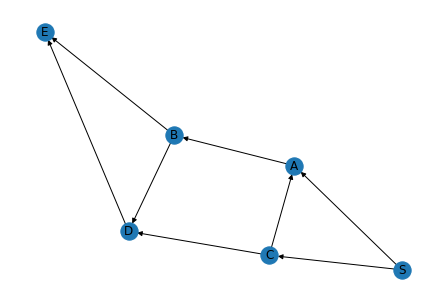

In [106]:
import matplotlib.pyplot as plt

nx.draw(G, with_labels=True, arrows=True)
plt.show()

In [175]:
data = pd.read_excel("string.xlsx")

In [176]:
data

,protein1,protein2
0,M6PR,SH3GL1
1,M6PR,STAM2
2,M6PR,UBQLN2
3,M6PR,NAPA
4,M6PR,VPS52
5,M6PR,CD4
6,M6PR,RAB9A
7,M6PR,SCARB2
8,M6PR,CD3G
9,M6PR,SLC18A3


********** 开始网页解析 **********
********** 网页解析完成 **********
========== 提取网页中通路信息 ==========
========== 成功提取网页中通路信息 ==========
========== 开始画图。。。 ==========


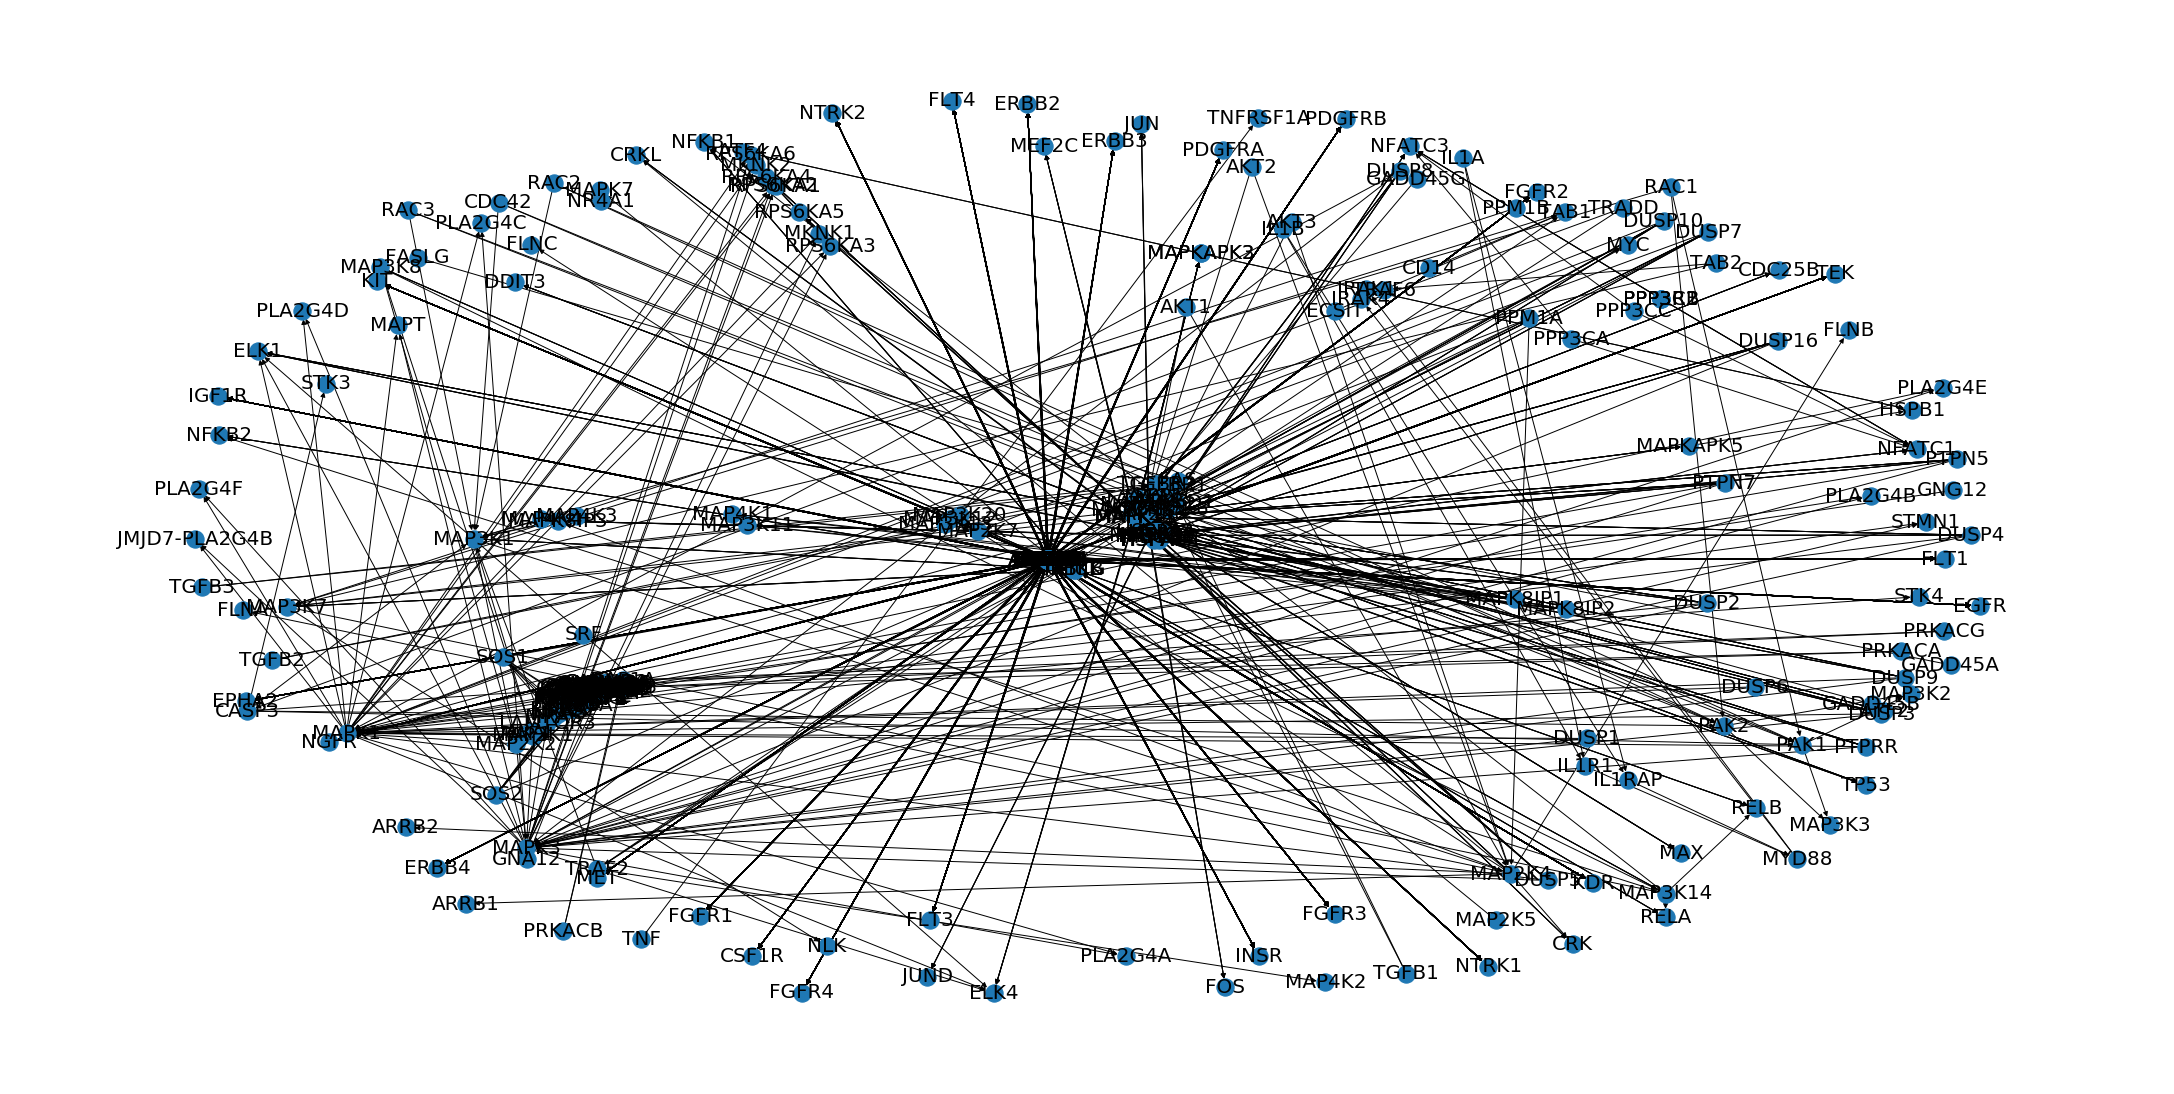

In [283]:
import time
import requests
import pandas as pd
import networkx as nx
from re import compile
from itertools import product
import matplotlib.pyplot as plt
from lxml.html import fromstring
from typing import List, Tuple, Dict


def getPathwayInfo(pid: str) -> Tuple[Dict[str, List[str]], List[Tuple[str]]]:
    """
    利用 KEGG 提供的 API 获取指定通路的信息，这些信息包括：
        1、每个节点所代表的基因
        2、节点与节点之间的作用关系
    input：KEGG 通路 id
    return：node2gids, relations
    """
    # 构造链接
    url = f'http://rest.kegg.jp/get/{pid}/kgml'  # python 3.6及以上
    # url = 'http://rest.kegg.jp/get/{}/kgml'.format(pid)
    # 网络请求，获取通路信息页面
    print("********** 开始网页解析 **********")
    r = requests.get(url)
    # Parse the XML, returning a single element/document.
    tree = fromstring(r.text)
    print("********** 网页解析完成 **********")
    # 正则提取模式，提取字符串 hsa: 后面的数字，即 gene id
    print("========== 提取网页中通路信息 ==========")
    p = compile(r"hsa:(\d+)")
    # node2gids 用于存储 {node id : gene id} 的 键-值 对字典
    node2gids = {}

    # tree.xpath("//entry[@type='gene']") 获取所有属性 type=gene 的 entry 节点
    for entry in tree.xpath("//entry[@type='gene']"):
        # 获取 entry 节点的属性值，用 get 方法
        # 获取每个节点代表的基因，一个节点可能有多个基因，建议将这些信息存为字典，可以根据节点 id 直接访问到 基因
        nid, gids = entry.get('id'), entry.get('name')
        node2gids[nid] = p.findall(gids)
    # relations 用于存储元组 (source, target, sub) 的列表，为节点与节点之间的作用关系
    relations = []
    # tree.xpath("//relation") 获取所有 relation 节点
    for relation in tree.xpath("//relation"):
        # 获取两个具有相互作用的结点
        source, target = relation.get('entry1'), relation.get('entry2')
        # 获取这两个节点的作用关系类型，激活、抑制、磷酸化等等，取第一个作用关系就行
        if relation.xpath('subtype') and source in node2gids and target in node2gids:
            sub = relation.xpath('subtype')[0].get('name') 
            relations.append((source, target, sub))
    print("========== 成功提取网页中通路信息 ==========")
    
    return node2gids, relations


def download():
    """
    下载 gene id 与基因 Symbol（即基因名）之间对应关系的文件
    速度较慢，可用浏览器自行下载
    """
    from urllib.request import urlretrieve
    url = 'http://rest.kegg.jp/list/hsa'
    urlretrieve(url, 'gene_info.txt')
    
    
def gid2symbol(filename, node2gids):
    """
    将节点与基因 id 之间的键-值对转换为节点与基因 symbol 之间的键-值对
    输入参数为存储基因信息的文件的文件名
    """
    
    # 读取基因信息，文件格式为 txt，无表头
    gene_info = pd.read_csv("gene_info.txt", sep='\t', header=None)
    # 将第一列的字符串 'hsa:' 去除
    gene_info[0] = gene_info[0].apply(lambda x: p.findall(x)[0])
    # 只取第二列的第一个逗号 ',' 或分号 ';' 前面的字符串，即基因 symbol
    gene_info[1] = gene_info[1].apply(lambda x: x.split(',')[0])
    gene_info[1] = gene_info[1].apply(lambda x: x.split(';')[0])
    # 以第一列作为索引，可根据索引直接获取索引对应的行，到达字典的目的，直接获取基因 id 对应的基因 symbol
    id2symbol = gene_info.set_index(0)
    # 将字典中的值（即基因 id 列表）全部转换为基因 symbol 列表
    node2symbol = {}
    for k in node2gids:
        node2symbol[k] = list(map(lambda x: id2symbol.loc[x][1], node2gids[k]))
    # 返回新的节点与基因 symbol字典
    return node2symbol


def construct_edges(relations, node2symbol):
    """
    构造边集合，代表两个基因之间之间的作用关系
    输入：节点之间的作用关系列表 relations， 节点所包含的基因
    return：列表，列表的每个元素为元组，代表一条边，每个元组包含三个字段，(源基因，靶基因，作用关系)
         1 代表作用关系为正向，-1代表作用关系为负向，用于后面计算两个基因之间边的权重
    """
    edges = []
    # 定义这三个关系为负向，其他关系为正向
    negative = ['inhibition', 'repression', 'dissociation']
    for s, t, r in relations:
        r_status = 1
        if r == negative:
            r_status = -1
        # * 用于解包，rel 是包含两个元素（基因）的元组，解包后再加上一个状态码，组成包含三个元素的元组
        gid2gid = [(*rel, r_status) for rel in product(node2symbol[s], node2symbol[t])]
        edges.extend(gid2gid)
        
    return edges


def getNetwork(edges):
    """
    利用提取出的每个 基因-基因 互作关系构造有向网络，然后利用有向网络获取每个基因的出度、入度
    根据每个基因的出度、入度以及作用关系的方向，计算出每条边的权重，然后重新构造有向网络
    input: 边的集合
    return：有向加权网络
    """
    # 将边映射成键为：(source, target)，值为：1（正向） or -1（负向）的字典
    edges_direction = {}
    for s, t, r in edges:
        edges_direction[(s, t)] = r
    # 先将这些边构建为有向图，用于计算每个基因的出度、入度
    G = nx.DiGraph()
    G.add_weighted_edges_from(edges)

    # 计算每条边的权重，先计算源基因的入度与出度之差，然后根据边的作用方式的正向、负向，对源基因与靶基因的权重相加、减
    # 从而得到边的权重
    weighted_edges = []
    for source, target in G.edges:
        weight_source = G.in_degree(source) - G.out_degree(source)
        weight_target = G.in_degree(target) - G.out_degree(target)
        weighted_edges.append((source, target, 
                               weight_source + weight_target * edges_direction.get((source, target))))
    # 获取到每条边的权重后，便可以构建有向图了
    DG = nx.DiGraph()
    DG.add_weighted_edges_from(weighted_edges)
    
    return DG


def KEGGNetwork(pid, filename):
    # 提取通路信息
    node2gids, relations = getPathwayInfo(pid)
    # 将基因 id 转换为基因 symbol
    node2symbol = gid2symbol(filename, node2gids)
    # 构建边列表，列表中每个元素代表一条边，每个元素包含三个字段(source, target, weight)
    edges = construct_edges(relations, node2symbol)
    # 构建有向加权图
    DG = getNetwork(edges)
    
    return DG


if __name__ == '__main__':
    pid = 'hsa04010'
    filename = 'gene_info.txt'
    DG = KEGGNetwork(pid, filename)
    # bellman_ford方法的单源最短路径
    shorted_path = nx.single_source_bellman_ford(DG, "NRAS")
    # 所有基因之间的最短路径
    all_gene_pairs_shorted_path = nx.floyd_warshall(DG)
    # 获取入度最大的 10 个基因
    inGene = sorted([(g, DG.in_degree(g)) for g in DG.nodes], key=lambda x: -x[1])[:10]
    # 获取出度最大的 10 个基因
    outGene = sorted([(g, DG.out_degree(g)) for g in DG.nodes], key=lambda x: -x[1])[:10]
    # 设置画布大小
    plt.figure(figsize=(30, 15))
    # 设置 基因名可见，箭头可见，以及基因名字体大小
    nx.draw(DG, with_labels=True, arrows=True, font_size=20)
    print("========== 开始画图啦。。。 ==========")
    plt.show()

========== 开始画图。。。 ==========


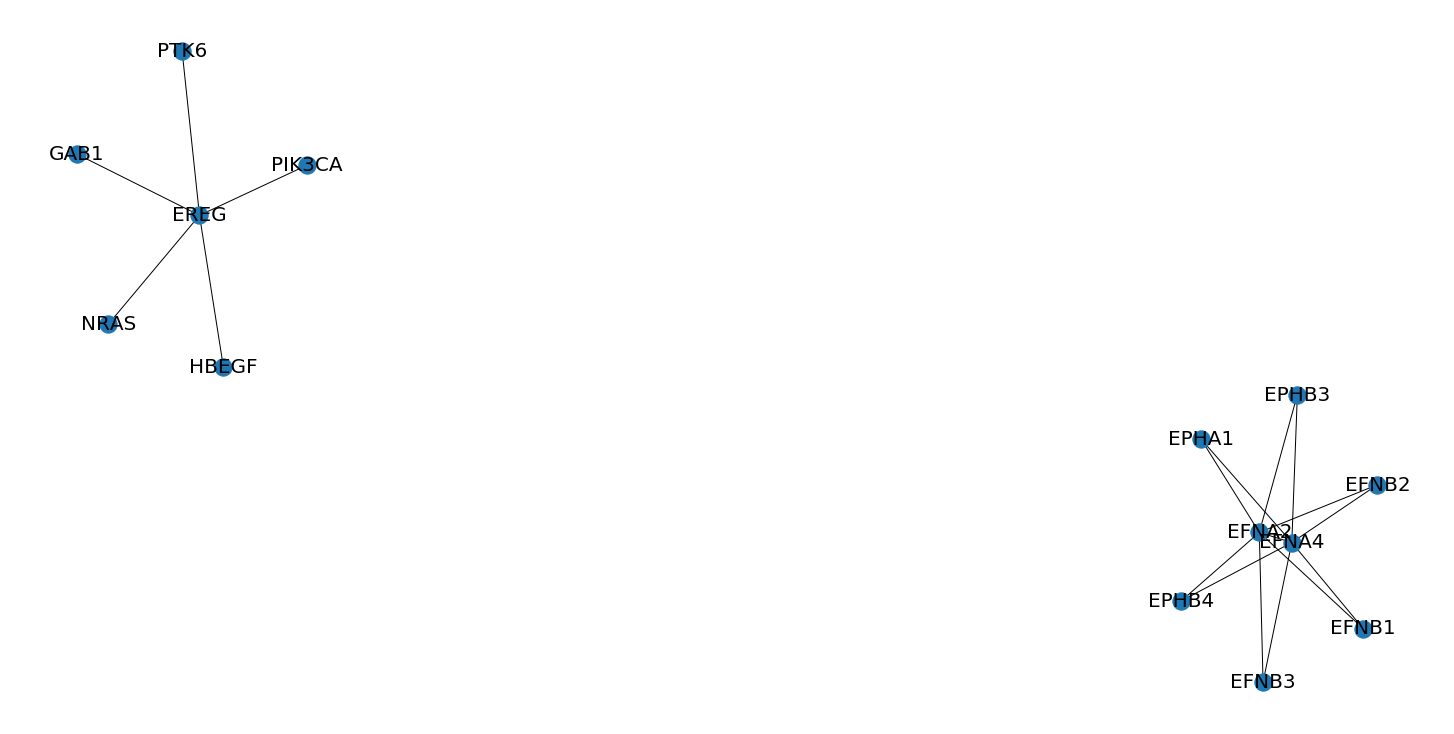

In [285]:
def StringNetwork():
    # 读取存储了边信息的文件
    data = pd.read_excel("string.xlsx")

    # 获取出度与入度排名前 10 的基因
    genes = set()
    for g in inGene:
        genes.add(g[0])
    for g in outGene:
        genes.add(g[0])

    # 去除重复的边
    edges = set()
    for i in data.index:
        edge = tuple(data.loc[i])
        if edge[::-1] not in edges:
            edges.add(edge)
    data = pd.DataFrame(edges, columns=['protein1', 'protein2'])

    # 提取第一个基因在 genes 中的边
    a = data.loc[data.protein1.isin(genes)]
    # 提取第二个基因在 genes 中的边
    b = data.loc[data.protein2.isin(genes)]
    # 将 DataFrame 格式转换为 List[Tuple]
    edges = []
    for i in a.append(b).values:
        edges.append(tuple(i))
    # 构建无向图
    G = nx.Graph()
    # 未给定权重，默认权重为 1
    G.add_edges_from(edges)

    return G


if __name__ == '__main__':
    G = StringNetwork()
    # dijkstra 方法的单源最短路径
    dijkstra_path = nx.single_source_dijkstra_path(G, 'NRAS')
    # bellman_ford 方法的单源最短路径
    dijkstra_path = nx.single_source_bellman_ford(G, "NRAS")
    # 所有基因之间的最短路径
    all_gene_pairs_shorted_path = nx.floyd_warshall(G)
    # 作图
    plt.figure(figsize=(20, 10))
    nx.draw(G, with_labels=True, arrows=True, font_size=20)
    print("========== 开始画图啦。。。 ==========")
    plt.show()